# Import libraries 

In [34]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
!pip install mlxtend

In [35]:
movies = pd.read_csv("C:/Users/hp/Downloads/my_movies.csv")
movies.head(20)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [36]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [37]:
df.shape

(10, 25)

# Apriori Algorithm 

In [76]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)


frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree..."
1393,0.1,"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree..."
1394,0.1,"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, LOTR..."
1395,0.1,"(V3_Harry Potter1, V5_LOTR2, Green Mile, LOTR2..."


In [78]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V4_Green Mile),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(LOTR1),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [40]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V3_Harry Potter1, Green Mile, LOTR1, LOTR2)","(Sixth Sense, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(V5_LOTR2, LOTR1, V1_Sixth Sense, V2_LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Harry Potter1, V5_LOTR2, Green Mile, V1_Sixth...","(LOTR1, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(V5_LOTR2, Green Mile, V1_Sixth Sense, V2_LOTR1)","(LOTR1, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(V5_LOTR2, Green Mile, Harry Potter1, LOTR1)","(V1_Sixth Sense, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(V5_LOTR2, Green Mile, V2_LOTR1, LOTR1)","(V1_Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(V5_LOTR2, Green Mile, Harry Potter1, V2_LOTR1)","(V1_Sixth Sense, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(V5_LOTR2, LOTR1, V1_Sixth Sense, LOTR2)","(Green Mile, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Harry Potter1, V5_LOTR2, V1_Sixth Sense, LOTR2)","(Green Mile, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(V5_LOTR2, V2_LOTR1, V1_Sixth Sense, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [41]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V4_Green Mile),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(LOTR1),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [50]:
movies.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [42]:
pd.crosstab(movies.Patriot,movies.Gladiator)

Gladiator,0,1
Patriot,,
0,3,1
1,0,6


<AxesSubplot:xlabel='V1'>

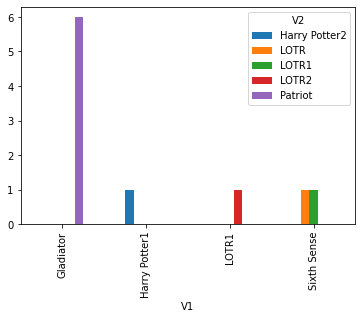

In [61]:
# bar plot between 2 different categories 
pd.crosstab(movies.V1,movies.V2).plot(kind="bar")

<AxesSubplot:ylabel='Gladiator'>

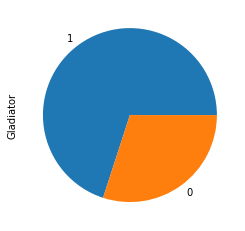

In [68]:
movies.Gladiator.value_counts().plot(kind="pie")

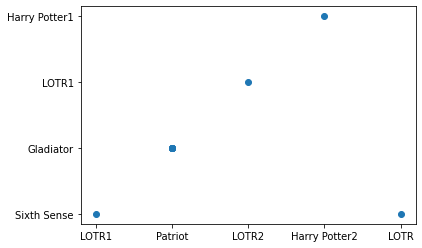

In [72]:
plt.scatter(movies.V2,movies.V1)## scatter plot of two variables

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

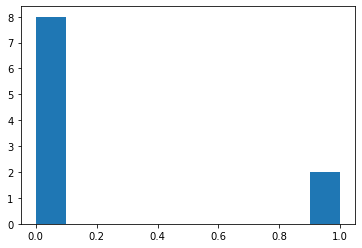

In [65]:
plt.hist(movies['Harry Potter1']) 